In [1]:
# import piplite
# await piplite.install('pydot')
# await piplite.install('python-statemachine')

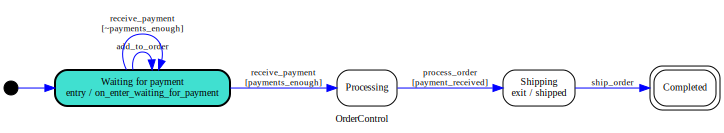

In [2]:
from statemachine import StateMachine, State


class OrderControl(StateMachine):
    waiting_for_payment = State("Waiting for payment", initial=True)
    processing = State("Processing")
    shipping = State("Shipping", exit="shipped")
    completed = State("Completed", final=True)

    add_to_order = waiting_for_payment.to(waiting_for_payment)
    receive_payment = (
        waiting_for_payment.to(processing, conditions="payments_enough") | 
        waiting_for_payment.to(waiting_for_payment, unless="payments_enough")
    )
    process_order = processing.to(shipping, conditions="payment_received")
    ship_order = shipping.to(completed)
    
    def __init__(self):
        self.order_total = 0
        self.payments = []
        self.payment_received = False
        super(OrderControl, self).__init__()

    def payments_enough(self, amount):
        return sum(self.payments) + amount >= self.order_total

    def before_add_to_order(self, amount):
        self.order_total += amount
        return self.order_total

    def before_receive_payment(self, amount):
        self.payments.append(amount)
        return self.payments

    def after_receive_payment(self):
        self.payment_received = True

    def on_enter_waiting_for_payment(self):
        self.payment_received = False
        
    def shipped(self):
        print("Shipped!")

control = OrderControl()

control

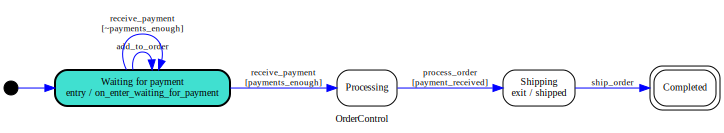

In [3]:
control.add_to_order(10)
control

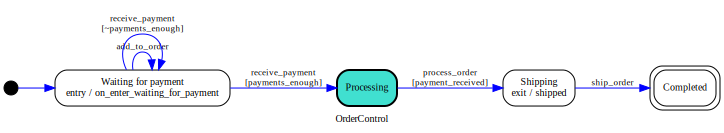

In [4]:
control.receive_payment(10)
control

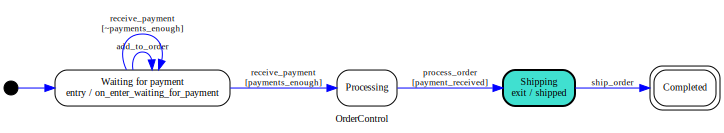

In [5]:
control.process_order()
control

Shipped!


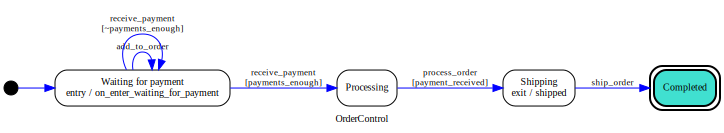

In [6]:
control.ship_order()
control